### Day 3 Notes

In [2]:
import math
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Returning to Andrew's Stats Problem:

In a company, there are 20 men and 10 women. Layoffs come and there are 5 men and 5 women that get laid off. Is this evidence of discrimination against women?

First, make the company:

In [1]:
import random
import numpy as np

company = []
for i in range(30):
    if i < 10:
        company.append('W')
    else:
        company.append('M')


Then, ax 10 people:

In [2]:
percent_women_laid_off = []

nsims = 10000

for i in range(nsims):
    lay_offs = random.sample(company,10) #lay off 10 people
    women_laid_off= lay_offs.count('W') #how many of those 10 were women?
    percent_women_laid_off.append(women_laid_off/10) #what percentage of those were women?10
print('first 20 sims', percent_women_laid_off[0:20])

first 20 sims [0.3, 0.3, 0.1, 0.3, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.2, 0.5, 0.4]


Then, figure out the probability of laying off greater or equal to 50 percent:

In [3]:
print((percent_women_laid_off.count(0.5)
    +percent_women_laid_off.count(0.6)
    +percent_women_laid_off.count(0.7)
    +percent_women_laid_off.count(0.8)
    +percent_women_laid_off.count(0.9)
    +percent_women_laid_off.count(1.0))/nsims)


0.1671


Then we ran a one sided proportion test:

In [9]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest(5,10,1/3, alternative = 'larger')
print(pval)

0.14592027257189422


Crap! On the TI, it gives us 0.13178!

What about the one proportion example listed in the statsmodel docs?

http://www.statsmodels.org/dev/_modules/statsmodels/stats/proportion.html

In [7]:
stat, pval = proportions_ztest(5, 83, 0.05)
print(pval)

0.6949650981148476


Crap! On the TI, it gives us 0.669!

However, a two proportion test gives us the same thing on the TI or in Python:

In [10]:
x1 = 5
n1 = 83
x2 = 12
n2 = 99

stat, pval = proportions_ztest([x1,x2], [n1,n2])
print(pval)

0.15918129181156992


Does anyone know what is going on??

### Bank Problem:

Define service and arrival functions at beginning:


In [13]:
from random import randint
def service_time():
    m=randint(0,99)                  
    if m<=24:
        return 1
    elif 25<=m<=44:
        return 2
    elif 45<=m<=84:
        return 3
    else:
        return 4
    
def arrival_between():
    n=randint(0,99)                                         
    if n<=9:
        return 0
    elif 10<=n<=24:
        return 1
    elif 25<=n<=34:
        return 2
    elif 35<=n<=69:
        return 3
    elif 70<=n<=94:
        return 4
    else:
        return 5

Then give first person their times:

In [14]:
#insert 1 here
people=150 #people at the bank each day
arrival=[] #arrival time
service=[] #service time
helpstart=[] #help start time
helpend=[] #help end time
waittime=[] #wait time

arrival.append(0) #assume the customer arrives when the bank opens
helpstart.append(0)#the customer gets helped right away at time t=0
waittime.append(0)#the first customer did not have to wait at all
service.append(service_time()) #assign first customer a service time
helpend.append(service[0]) #the customer finishes after their service time is over    

Then give everyone else their service and arrival between times:

In [15]:
for person in range(1,people): #you already gave the first person their values so start at 1 not 0      
    service.append(service_time())
    arrival.append(arrival_between()+arrival[person-1])

Update each customer’s help start, help end, and wait times. You will need to update differently depending on whether the next customer arrived before or after the last person’s service finished.

In [17]:
for person in range(1,people):                              #you already serviced the first person so start at 1 not 0
    if arrival[person]>=helpend[person-1]:                  #if the next customer arrives after the last customer is finished, 
        helpstart.append(arrival[person])                   #then the next customer gets helped right away as soon as they arrive       
        helpend.append(helpstart[person]+service[person])   #and his/her end time is their arrival time plus their service time
        waittime.append(0)                                  #and they didn't have to wait at all
    else:                                                   #if the next customer arrives before the last customer is finished,
        helpstart.append(helpend[person-1])                 #then the next customer gets helped when the customer before he/she finishes
        helpend.append(helpstart[person]+service[person])   #and his/her end time is their service time plus when they started getting helped
        waittime.append(helpstart[person]-arrival[person])  #and they had to wait the difference between when they arrived and were helped

Calculate average wait time:

In [18]:
print('average wait time = ', np.mean(waittime))

average wait time =  8.488294314381271


Put it all in a loop:

In [19]:
days = 10000
people=150 #people at the bank each day
total_waittime = []

for day in range(days):
    
    #you need to clear these lists for each new day
    arrival=[] #arrival time
    service=[] #service time
    helpstart=[] #help start time
    helpend=[] #help end time
    waittime=[] #wait time
    
    #-----------------------------------
    # give the very first customer his/her arrival and service time
    #-----------------------------------
    arrival.append(0) #the customer arrives when the bank opens
    helpstart.append(0)#the customer gets helped right away at time t=0
    waittime.append(0)#the first customer did not have to wait at all
    service.append(service_time()) #randomly assign first customer service time                                    
    helpend.append(service[0]) #the customer finishes after their service time is over  
    
    #-----------------------------------
    #give all of the other customers arrival and service times
    #-----------------------------------
    for person in range(1,people):
    #-----------------------------------
    #set up arrival time probabilities:
    #-----------------------------------
        arrival.append(arrival_between()+arrival[person-1])
    #-----------------------------------
    #set up service time probabilities:
    #-----------------------------------        
        service.append(service_time())
    #-----------------------------------
    #service all of the other customers
    #-----------------------------------
    for person in range(1,people):
        if arrival[person]>=helpend[person-1]:                  #if the next customer arrives after the last customer is finished, 
            helpstart.append(arrival[person])                   #then the next customer gets helped right away       
            helpend.append(helpstart[person]+service[person])   #and his/her end time is their arrival time plus their service time
            waittime.append(0)                                  #and they didn't have to wait at all
        else:                                                   #if the next customer arrives before the last customer is finished,
            helpstart.append(helpend[person-1])                 #then the next customer gets helped when the customer before he/her finishes
            helpend.append(helpstart[person]+service[person])   #and his/her end time is their service time plus when they started getting helped
            waittime.append(helpstart[person]-arrival[person])  #and they had to wait the difference between when the arrived and were helped

    total_waittime.append(sum(waittime)/len(waittime))
    
print('average wait time = ', np.mean(total_waittime))


average wait time =  4.9143273333333335


It varies quite a bit!

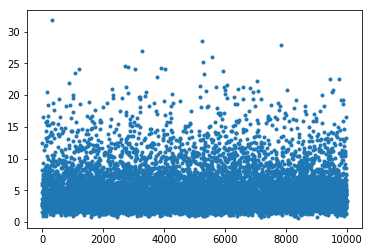

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

days = range(10000)
plt.plot(days, total_waittime,'.')

You can play around with changing service/arrival time probabilities to get the average wait time under 2 minutes. Or, use Albert's two teller solution:

In [16]:
import random
import numpy as np


daily_avg_wait_time = []

def customerArrived():
    
    arrived = random.randint(0,99)
    
    if 0 <= arrived < 10:
        arrival_time.append(0)  
        
    elif 10 <= arrived < 25:
        arrival_time.append(1)
       
    elif 25 <= arrived < 35:
        arrival_time.append(2)
      
    elif 35 <= arrived < 70:
        arrival_time.append(3)
       
    elif 70 <= arrived < 95:
        arrival_time.append(4)
       
    elif 95 <= arrived < 100:
        arrival_time.append(5)
        
        
def serviceTime():
    
    timeServed = random.randint(0,99)
    if 0 <= timeServed < 25:
        service_time.append(1)
        
    elif 25 <= timeServed < 45:
        service_time.append(2)
        
    elif 45 <= timeServed < 85:
        service_time.append(3)
      
    elif 85 <= timeServed < 100:
        service_time.append(4)
         
def waitTime(n):
    for i in range(1,n):
  
        wait = service_time[i-1]+wait_time[i-1]-arrival_time[i]
   
        #######################################################################################
        ##############          Code for Second Teller             ############################
        if wait > 0:# and i <= 75:
            wait = service_time[i-2]+wait_time[i-2]-arrival_time[i-1]-arrival_time[i]
        #######################################################################################
    
        if wait <= 0:
            wait_time.append(0)
        else:
            wait_time.append(wait)
    
for days in range(1000):
    arrival_time = []
    service_time = []
    wait_time = [0]
    customers = 150
    for i in range(customers):
        customerArrived() 
        serviceTime()  

    waitTime(customers)
    
    daily_avg_wait_time.append(np.mean(wait_time))
    
print('average wait time after 1000 days: ', np.mean(daily_avg_wait_time))

average wait time after 1000 days:  0.12061333333333335


Here's the most important part:

In [23]:
def waitTime(n):
    for i in range(1,n):
  
        wait = service_time[i-1]+wait_time[i-1]-arrival_time[i]
   
        #######################################################################################
        ##############          Code for Second Teller             ############################
        if wait > 0:# and i <= 75:
            wait = service_time[i-2]+wait_time[i-2]-arrival_time[i-1]-arrival_time[i]
        #######################################################################################
    
        if wait <= 0:
            wait_time.append(0)
        else:
            wait_time.append(wait)
    
for days in range(1000):
    arrival_time = []
    service_time = []
    wait_time = [0]
    customers = 150
    for i in range(customers):
        customerArrived() 
        serviceTime()  

    waitTime(customers)
    
    daily_avg_wait_time.append(np.mean(wait_time))